# Principal Component Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
data = pd.read_csv('Mall_Customers_cluster.csv')

In [9]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
# Preprocessing
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [13]:
# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data scaled successfully.")

Data scaled successfully.


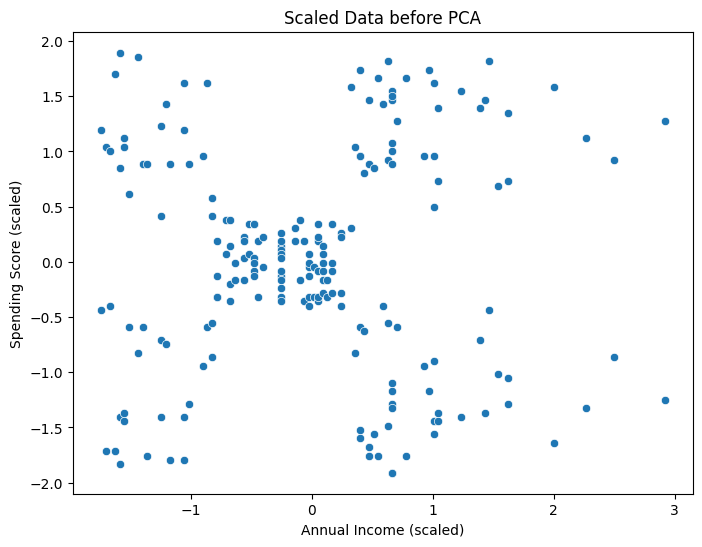

In [16]:
# Visualization of the scaled data before PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2])
plt.title('Scaled Data before PCA')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [17]:
pca_full = PCA(n_components=None)
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Explained variance by component: {explained_variance}")
print(f"Cumulative explained variance: {cumulative_variance}")

Explained variance by component: [0.44266167 0.33308378 0.22425454]
Cumulative explained variance: [0.44266167 0.77574546 1.        ]


In [18]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle=':', label='90% Variance')
plt.legend()
plt.grid(True)
plt.savefig("pca_explained_variance.png")
plt.clf()
print("Saved 'pca_explained_variance.png'.")
print("Based on the plot, 2 components capture a significant portion of the variance,")
print("and 3 components capture 100% (as we started with 3 features).")
print("We will choose 2 components for effective dimensionality reduction and 2D visualization.")

Saved 'pca_explained_variance.png'.
Based on the plot, 2 components capture a significant portion of the variance,
and 3 components capture 100% (as we started with 3 features).
We will choose 2 components for effective dimensionality reduction and 2D visualization.


<Figure size 800x500 with 0 Axes>

In [19]:
n_components_chosen = 2
pca = PCA(n_components=n_components_chosen)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for the principal components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_chosen)])
print(f"Data transformed into {n_components_chosen} components.")
print(df_pca.head())

Data transformed into 2 components.
        PC1       PC2
0 -0.615720 -1.763481
1 -1.665793 -1.820747
2  0.337862 -1.674799
3 -1.456573 -1.772430
4 -0.038465 -1.662740


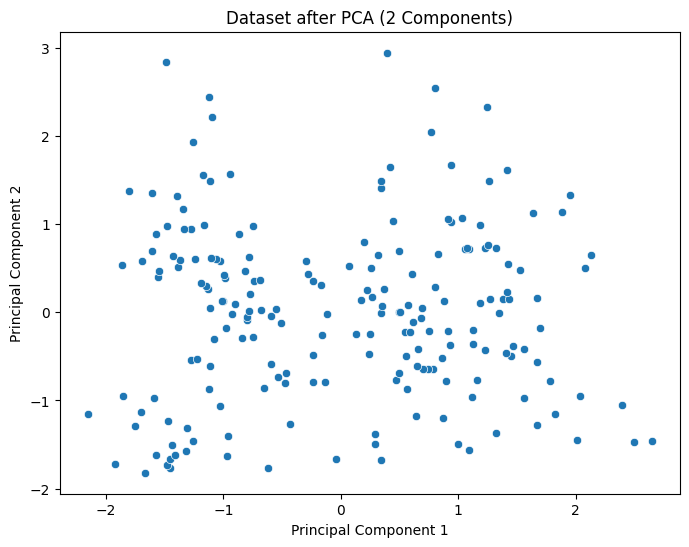

Saved 'scatter_after_pca.png'.


<Figure size 640x480 with 0 Axes>

In [22]:
# Before and after PCA visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Dataset after PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
plt.clf()
print("Saved 'scatter_after_pca.png'.")

In [24]:
inertia_3d = []
inertia_pca = []
k_range = range(1, 11)

for k in k_range:
    kmeans_3d = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia_3d.append(kmeans_3d.inertia_)
    
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_pca)
    inertia_pca.append(kmeans_pca.inertia_)

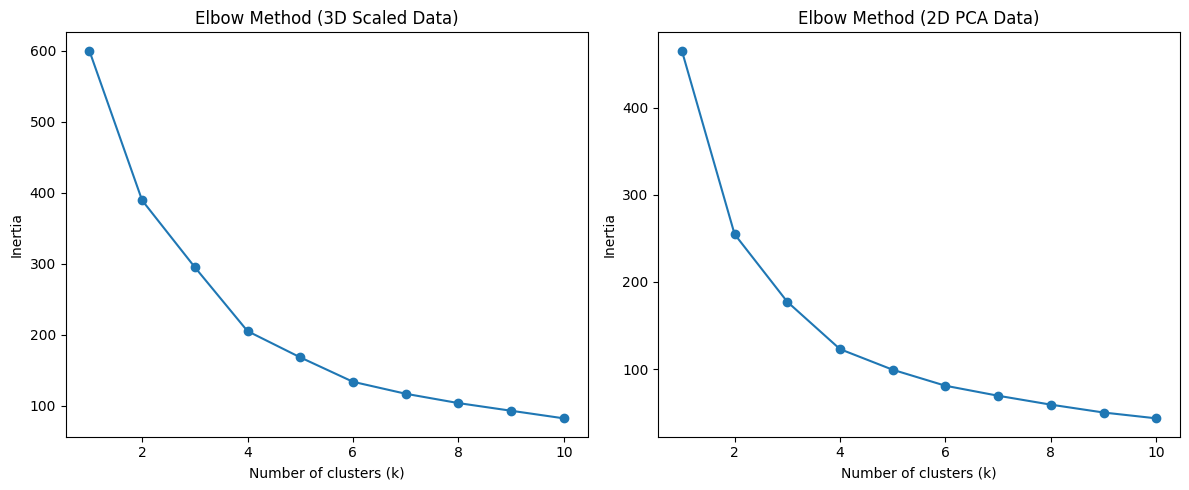

Saved 'elbow_plots.png'. Both plots suggest an 'elbow' around k=5.
--- Clustering Performance (k=5) ---
Silhouette Score (Original 3D data): 0.4166
Silhouette Score (PCA 2D data):      0.3931


<Figure size 640x480 with 0 Axes>

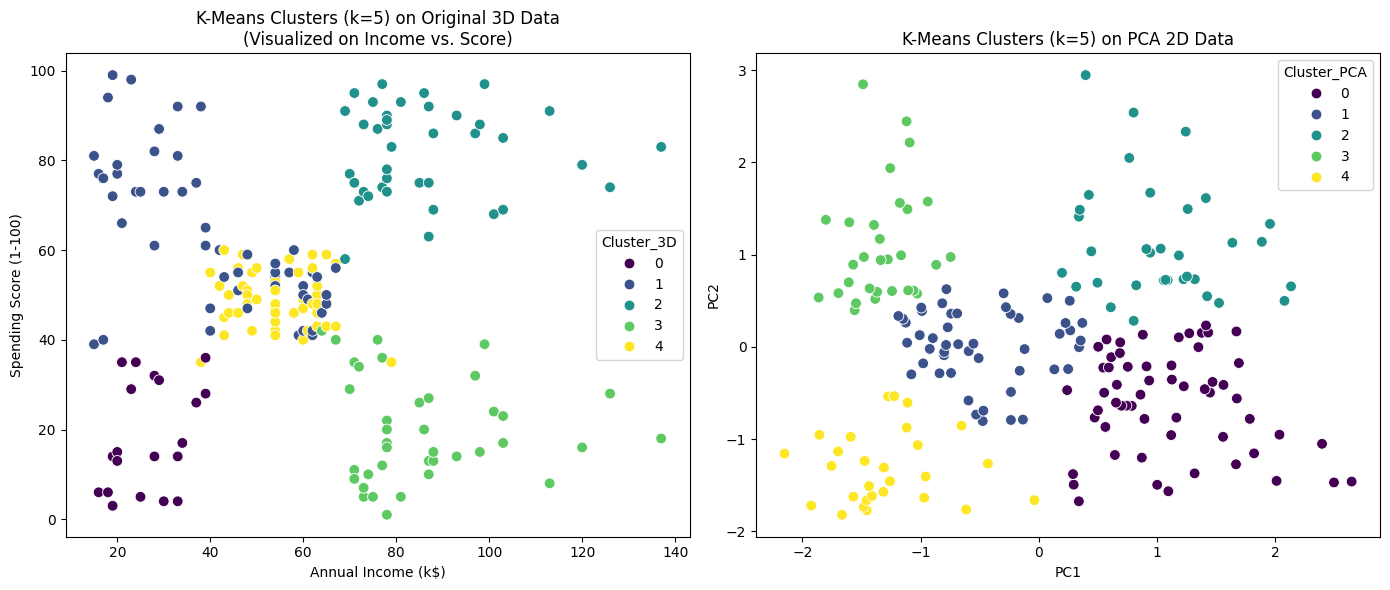

Saved 'cluster_comparison.png'.


<Figure size 640x480 with 0 Axes>

In [25]:
# Plot Elbow curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_3d, marker='o')
plt.title('Elbow Method (3D Scaled Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, inertia_pca, marker='o')
plt.title('Elbow Method (2D PCA Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.savefig("elbow_plots.png")
plt.show()
plt.clf()
print("Saved 'elbow_plots.png'. Both plots suggest an 'elbow' around k=5.")

# Perform clustering with k=5
k_optimal = 5

# Clustering on 3D data
kmeans_3d = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters_3d = kmeans_3d.fit_predict(X_scaled)
silhouette_3d = silhouette_score(X_scaled, clusters_3d)

# Clustering on 2D PCA data
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)
silhouette_pca = silhouette_score(X_pca, clusters_pca)

print(f"--- Clustering Performance (k={k_optimal}) ---")
print(f"Silhouette Score (Original 3D data): {silhouette_3d:.4f}")
print(f"Silhouette Score (PCA 2D data):      {silhouette_pca:.4f}")

# Visualize clustering results
data['Cluster_3D'] = clusters_3d
df_pca['Cluster_PCA'] = clusters_pca

plt.figure(figsize=(14, 6))

# Plot 3D clusters (using original 'Annual Income' vs 'Spending Score' for clarity)
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster_3D'], palette='viridis', s=60)
plt.title('K-Means Clusters (k=5) on Original 3D Data\n(Visualized on Income vs. Score)')

# Plot PCA clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster_PCA'], palette='viridis', s=60)
plt.title('K-Means Clusters (k=5) on PCA 2D Data')

plt.tight_layout()
plt.savefig("cluster_comparison.png")
plt.show()
plt.clf()
print("Saved 'cluster_comparison.png'.")
plt.show()